<a href="https://colab.research.google.com/github/NorpajSucces/Submission-Membangun-Proyek-Machine-Learning-IDCAMPxDicoding/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Zhafran_Pradistyatama_Kuncoro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

**Sumber Dataset**:  
   Dataset dapat diperoleh dari Kaggle.
   


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/NorpajSucces/Submission-Membangun-Proyek-Machine-Learning-IDCAMPxDicoding/main/dataset/Shopping_Mall_Customer_Segmentation_Data.csv')

df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **a. Struktur Data**

Perintah kode ini untuk mengetahui jumlah baris dan kolom pada dataset.

In [8]:
df.shape

(15079, 5)

Data ini tidak terdapat missing value, bisa dilihat dari 5 columns yang bertuliskan non-null, yang berarti tidak memiliki missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


Fungsi ini memberikan ringkasan statistik untuk kolom-kolom numerik, seperti jumlah data, nilai rata-rata, standar deviasi, serta nilai minimum dan maksimum. Ini membantu kita memahami distribusi data dan mengidentifikasi outlier atau anomali yang mungkin ada.

In [10]:
df.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


## **b. Data yang hilang**

In [11]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Annual Income,0
Spending Score,0


**Pada data ini tidak terdapat missing value, sehingga tidak perlu menghapus atau menambahkan pada dataset**

## **c. Analisis Distribusi dan Korelasi**

### Gender Distribusi

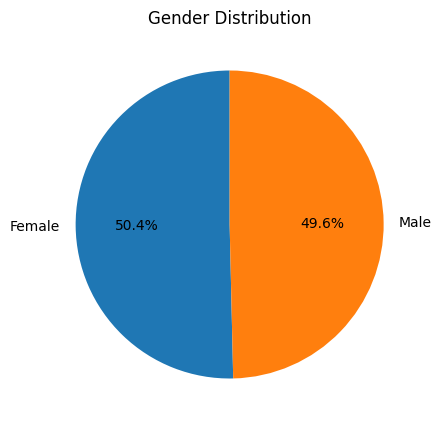

In [12]:
plt.figure(figsize=(5, 5))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

### Age Distribution




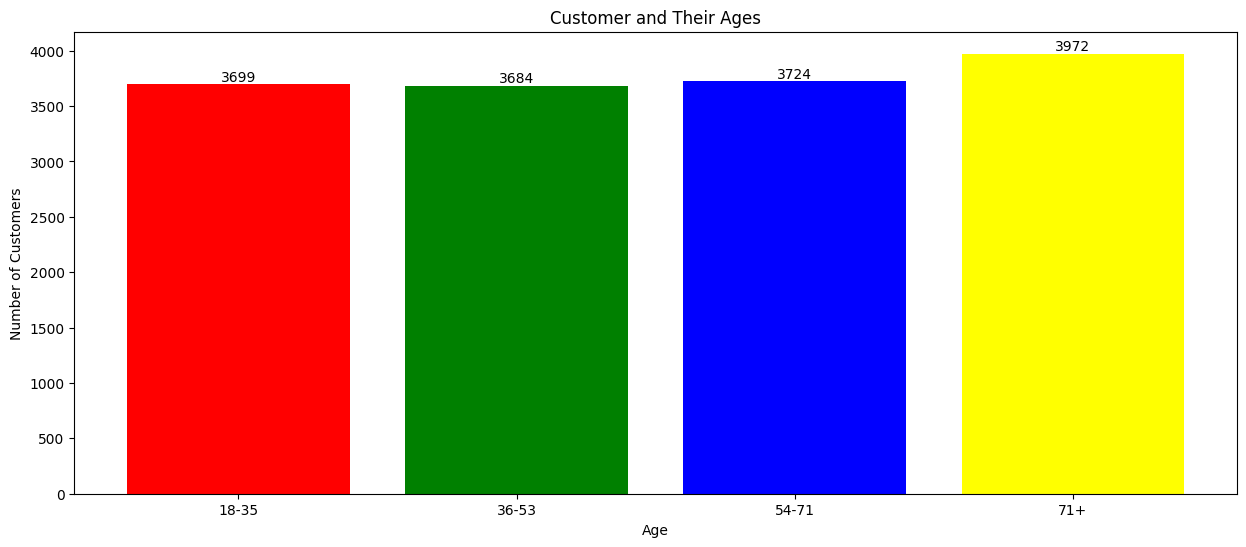

In [13]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_35 = df.Age[(df.Age >= 18) & (df.Age <= 35)]
age36_53 = df.Age[(df.Age >= 36) & (df.Age <= 53)]
age54_71 = df.Age[(df.Age >= 54) & (df.Age <= 71)]
age72above = df.Age[df.Age >= 72]

# Menyusun data untuk plotting
x = ["18-35", "36-53", "54-71", "71+"]
y = [len(age18_35.values), len(age36_53.values), len(age54_71.values), len(age72above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()


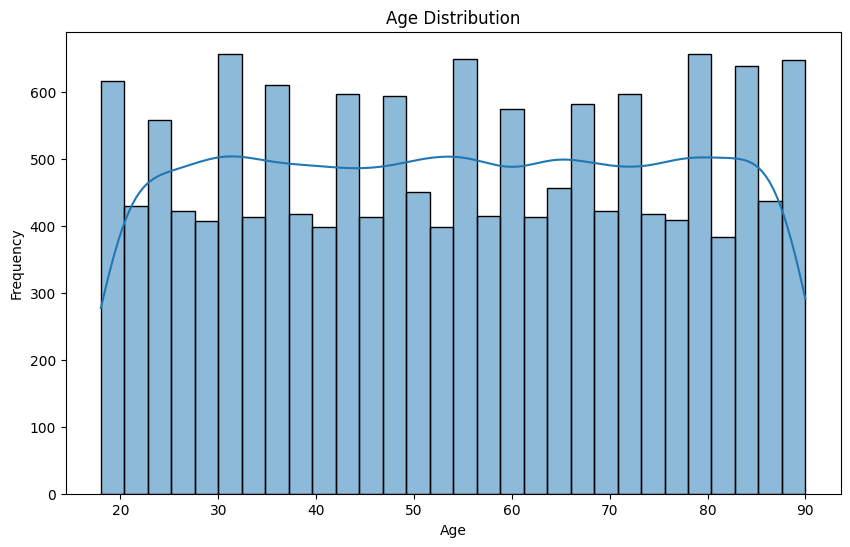

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Annual Income Distribution

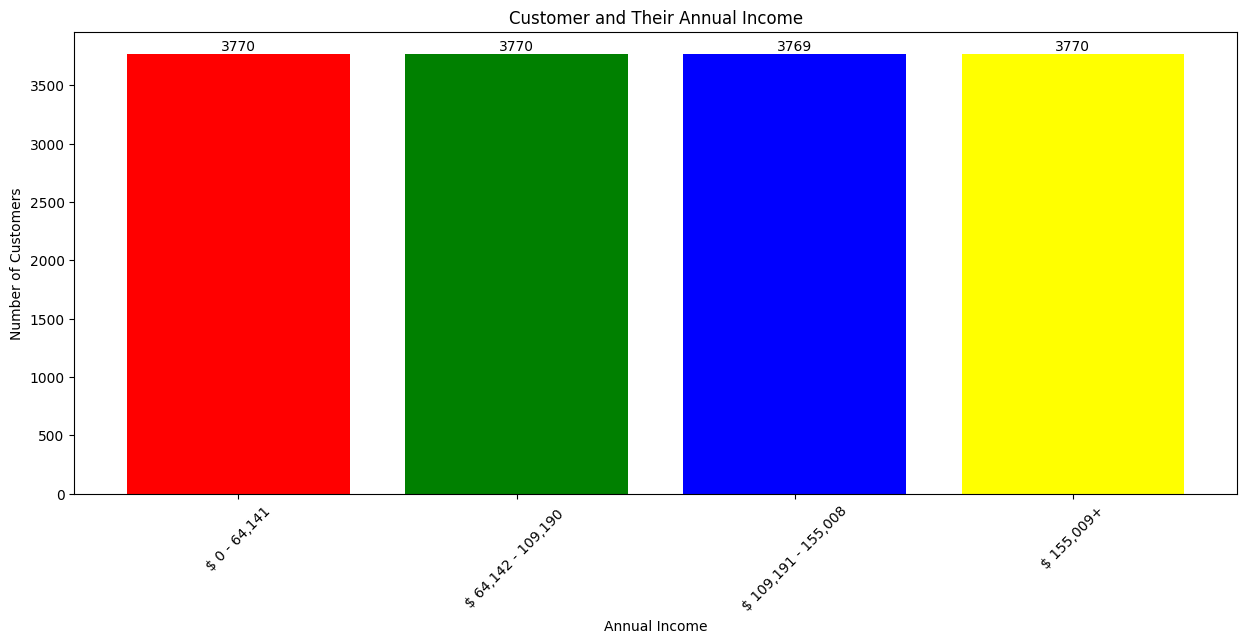

In [15]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_64 = df["Annual Income"][(df["Annual Income"] >= 0) & (df["Annual Income"] <= 64141)]
ai64_109 = df["Annual Income"][(df["Annual Income"] >= 64142) & (df["Annual Income"] <= 109190)]
ai109_155 = df["Annual Income"][(df["Annual Income"] >= 109191) & (df["Annual Income"] <= 155008)]
ai155 = df["Annual Income"][(df["Annual Income"] >= 155009)]

# Menyusun data untuk plotting
aix = ["$ 0 - 64,141", "$ 64,142 - 109,190 ", "$ 109,191 - 155,008", "$ 155,009+"]
aiy = [len(ai0_64.values), len(ai64_109.values), len(ai109_155.values), len(ai155.values)]

# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue',  'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

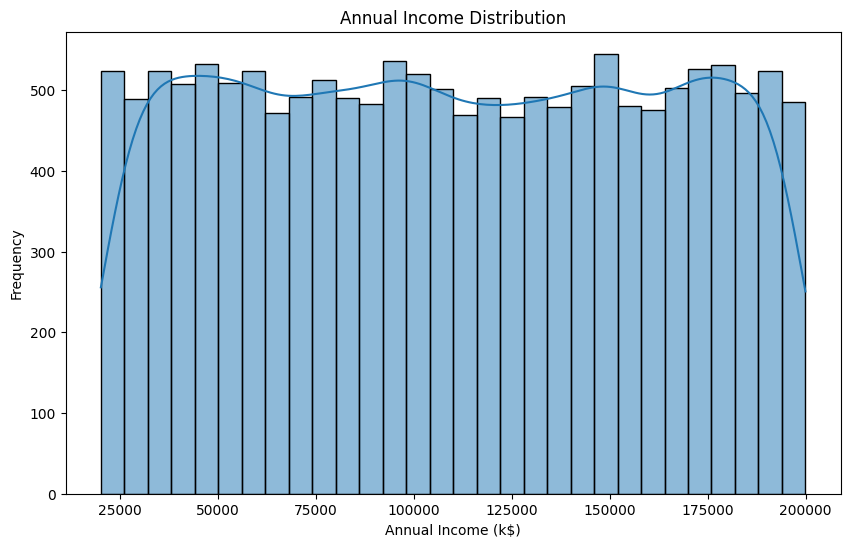

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

### Spending Score Distribution

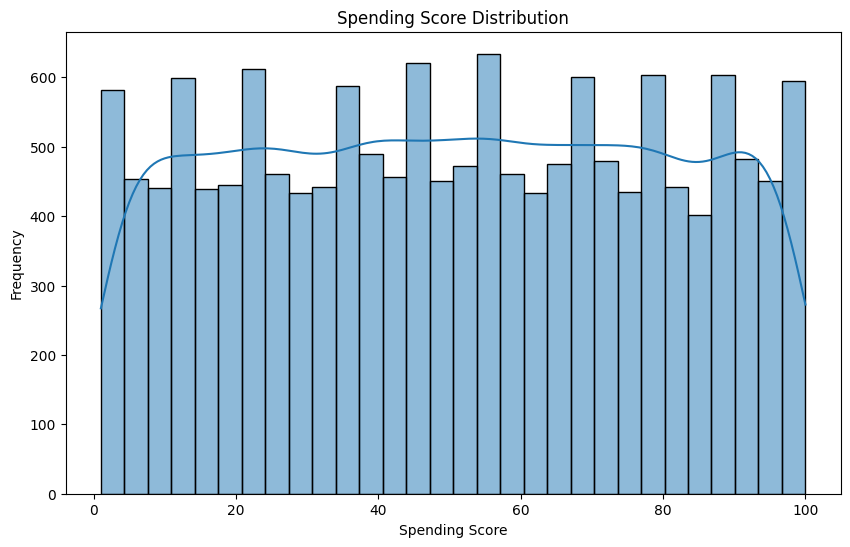

In [17]:
# Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score'], kde=True, bins=30)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

### Correlation Matrix : Age, Annual Income, Spending Score

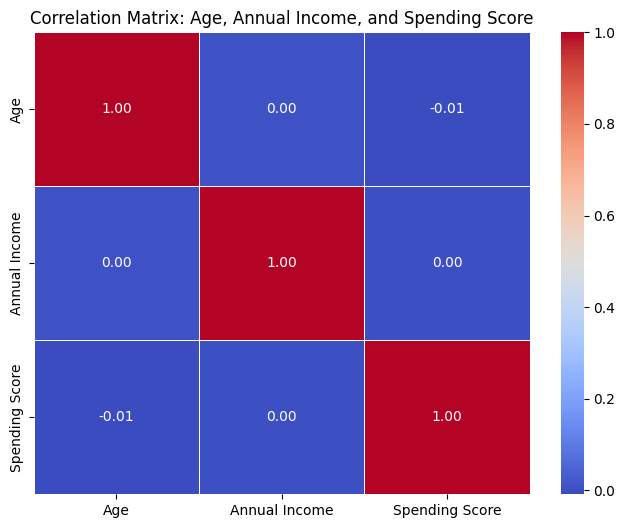

In [18]:
# Memilih kolom yang ingin dianalisis korelasinya
correlation_data = df[['Age', 'Annual Income', 'Spending Score']]

# Menghitung matriks korelasi
correlation_matrix = correlation_data.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Age, Annual Income, and Spending Score')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Karena Ridak ada data yang kosong, jadi nomor 1 tidak perlu dilakukan**

### **a. Menghapus Data Duplikat**


In [19]:
# Cek data duplikat
print(f"Jumlah duplikat: {df.duplicated().sum()}")

Jumlah duplikat: 0


**Karena tidak ada data yang duplikat, jadi tidak perlu menghapus data**

### **b. Normalisasi atau Standarisasi fitur**

In [30]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan StandardScaler pada semua fitur numerik
numerical_features = ['Age', 'Annual Income', 'Spending Score']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features]

,Age,Annual Income,Spending Score
0,-1.145516,0.798813,1.337059
1,0.180335,1.442076,1.545929
2,0.369742,-0.743208,0.884507
3,-1.476979,-1.038953,0.223086
4,-1.429627,0.842317,0.884507
...,...,...,...
15074,-1.192868,-0.230056,-0.716828
15075,-1.524331,-0.696335,0.814884
15076,-1.713738,0.049650,-0.090218
15077,-1.334923,-0.295341,-1.587119


In [21]:
# scaler = StandardScaler()
# scaled_df = scaler.fit_transform(correlation_data)

### **c. Deteksi dan penanganan outliers**

In [31]:
# IQR pada data yang telah dinormalisasi
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier berdasarkan IQR
outliers_iqr = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound))

In [32]:
# Menampilkan jumlah outlier per fitur
outliers_summary_iqr = outliers_iqr.sum()
print("Jumlah Outlier Berdasarkan IQR (Data Dinormalisasi):")
print(outliers_summary_iqr)

Jumlah Outlier Berdasarkan IQR (Data Dinormalisasi):
Age               0
Annual Income     0
Spending Score    0
dtype: int64


**Karena tidak terdapat outlier, maka tidak perlu melakukan penghapusan**

### **d. Encoding Data Kategorikal (Gender)**

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding untuk variabel Gender
label_encoder = LabelEncoder()
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

# One-Hot Encoding untuk variabel Gender
df_onehot = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Output contoh
print("Dengan Label Encoding:\n", df[['Gender', 'Gender_Encoded']].head())
print("\nDengan One-Hot Encoding:\n", df_onehot.head())


Dengan Label Encoding:
    Gender  Gender_Encoded
0    Male               1
1  Female               0
2  Female               0
3    Male               1
4    Male               1

Dengan One-Hot Encoding:
                             Customer ID       Age  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7 -1.145516       0.798813   
1  1770b26f-493f-46b6-837f-4237fb5a314e  0.180335       1.442076   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e  0.369742      -0.743208   
3  9795712a-ad19-47bf-8886-4f997d6046e3 -1.476979      -1.038953   
4  64139426-2226-4cd6-bf09-91bce4b4db5e -1.429627       0.842317   

   Spending Score  Cluster  Gender_Encoded  Gender_Male  
0        1.337059        2               1         True  
1        1.545929        4               0        False  
2        0.884507        1               0        False  
3        0.223086        0               1         True  
4        0.884507        2               1         True  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [42]:
# Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_features])
    inertia.append(kmeans.inertia_)


In [43]:
# Melatih model dengan jumlah cluster optimal (misalnya k=5)
optimal_k = 5  # Ganti dengan jumlah cluster optimal dari Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df[numerical_features])

# Menambahkan label cluster ke dataset
df['Cluster'] = kmeans.labels_

# Melihat jumlah pelanggan di setiap cluster
print(df['Cluster'].value_counts())


Cluster
2    3280
1    3234
3    3232
4    2722
0    2611
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

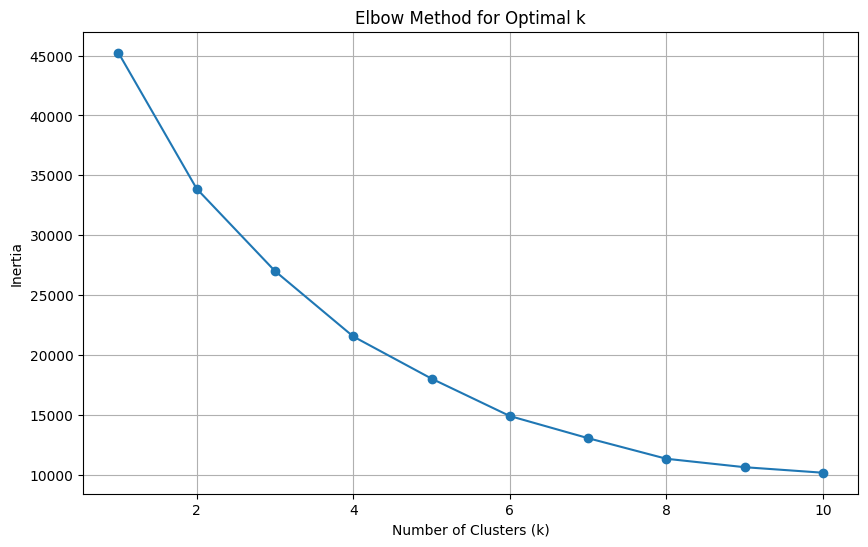

In [36]:
# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [44]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df[['Age', 'Annual Income', 'Spending Score']], df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.27


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

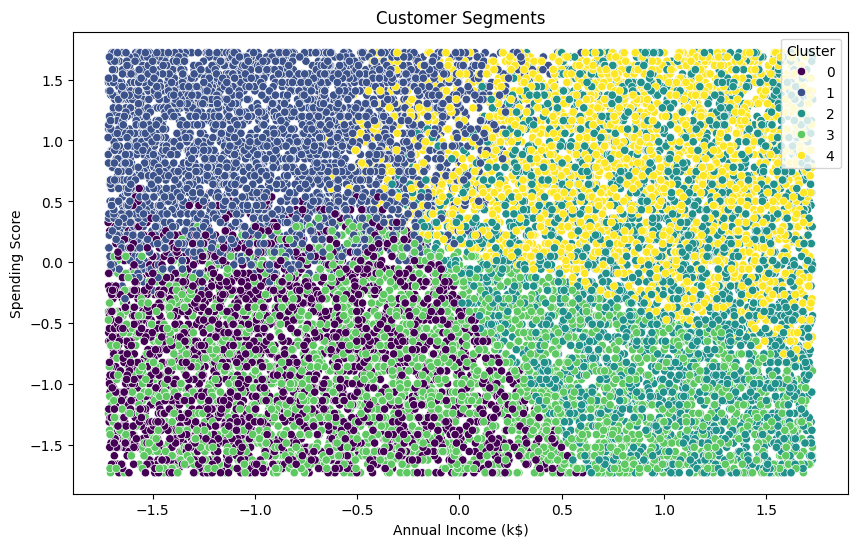

In [46]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [47]:
# Analisis statistik deskriptif untuk setiap cluster
cluster_analysis = df.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].describe()
print(cluster_analysis)


            Age                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        2611.0 -0.822813  0.551446 -1.713738 -1.287572 -0.861405 -0.387887   
1        3234.0 -0.053613  0.884161 -1.713738 -0.719350 -0.056424  0.606502   
2        3280.0 -0.908800  0.524323 -1.713738 -1.334923 -0.956109 -0.529942   
3        3232.0  0.938961  0.488558 -0.435239  0.559150  0.985316  1.364131   
4        2722.0  0.833171  0.562279 -0.577294  0.417094  0.890613  1.316779   

                  Annual Income            ...                      \
              max         count      mean  ...       75%       max   
Cluster                                    ...                       
0        0.559150        2611.0 -0.826317  ... -0.377804  0.602383   
1        1.695594        3234.0 -0.893493  ... -0.495737  0.594746   
2        0.464446

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

<ipython-input-49-6e2fadcdb6a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df, palette='Set2')


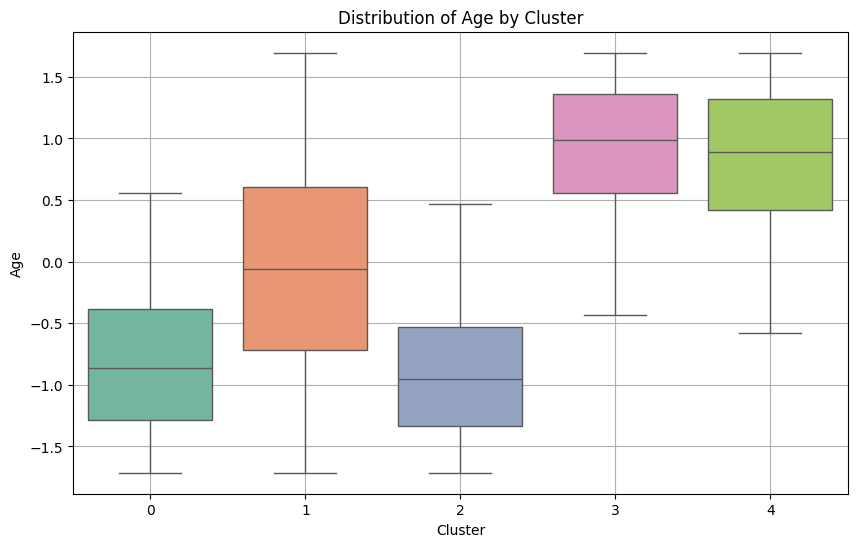

In [49]:
# Visualisasi distribusi Age dalam setiap cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df, palette='Set2')
plt.title('Distribution of Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.grid()
plt.show()

<ipython-input-50-febb4c4387fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income', data=df, palette='Set2')


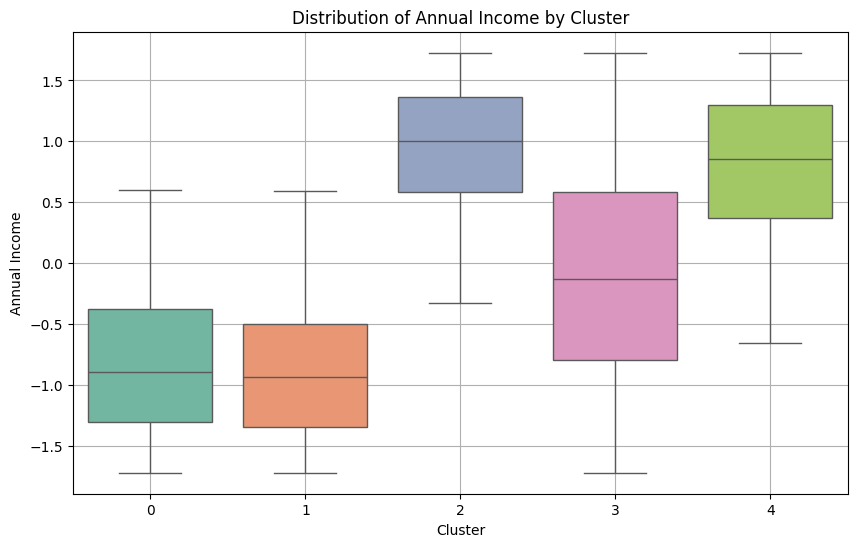

In [50]:
# Visualisasi distribusi Annual Income dalam setiap cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income', data=df, palette='Set2')
plt.title('Distribution of Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income')
plt.grid()
plt.show()

<ipython-input-51-162b84867b80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score', data=df, palette='Set2')


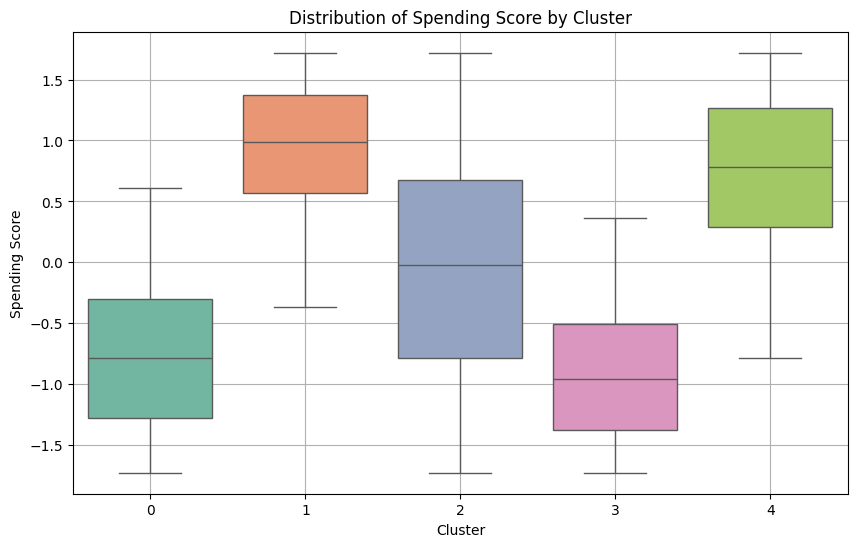

In [51]:
# Visualisasi distribusi Spending Score dalam setiap cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score', data=df, palette='Set2')
plt.title('Distribution of Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.grid()
plt.show()


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [52]:
# Menyimpan hasil clustering ke dalam file CSV
output_file = "clustered_data.csv"  # Nama file output
df.to_csv(output_file, index=False)  # Simpan tanpa menyertakan index

print(f"Data telah berhasil diekspor ke file: {output_file}")


Data telah berhasil diekspor ke file: clustered_data.csv
